In [2]:
## importing the packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [3]:
data = pd.read_csv("iphone_purchase_records.csv")
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
## copying the data
data.copy()
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [5]:
## data analysis
columns=data.columns
columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [6]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
## checking the missing values
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [9]:
data.shape

(400, 4)

In [10]:
data.corr()

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [11]:
## checking the duplicates
data.duplicated().sum()

20

In [12]:
## checking counts of unique values of Gender
for i in range(0,len(columns)):
    print("The unique values and their count in column",columns[i])
    print(data.iloc[::,i].value_counts())
    print("="*50)

The unique values and their count in column Gender
Female    204
Male      196
Name: Gender, dtype: int64
The unique values and their count in column Age
35    32
37    20
26    16
42    16
41    16
39    15
40    15
47    14
48    14
27    13
38    13
46    12
28    12
36    12
30    11
31    11
49    10
29    10
24     9
32     9
33     9
45     7
59     7
60     7
19     7
20     7
52     6
34     6
25     6
23     6
58     6
57     5
53     5
18     5
22     5
50     4
54     4
21     4
43     3
55     3
56     3
51     3
44     2
Name: Age, dtype: int64
The unique values and their count in column Salary
72000     12
80000     11
79000     10
71000      9
75000      9
          ..
48000      1
148000     1
101000     1
69000      1
126000     1
Name: Salary, Length: 117, dtype: int64
The unique values and their count in column Purchase Iphone
0    257
1    143
Name: Purchase Iphone, dtype: int64


In [13]:
data.iloc[::,0].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

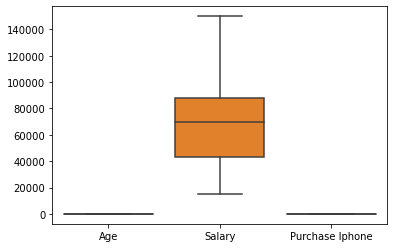

In [14]:
## checking the outliers
sns.boxplot(data=data)

<AxesSubplot:xlabel='Purchase Iphone', ylabel='Density'>

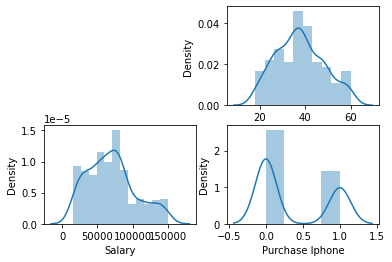

In [15]:
plt.subplot(222)
sns.distplot(data['Age'])
plt.subplot(223)
sns.distplot(data['Salary'])
plt.subplot(224)
sns.distplot(data['Purchase Iphone'])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'Purchase Iphone'}>, <AxesSubplot:>]],
      dtype=object)

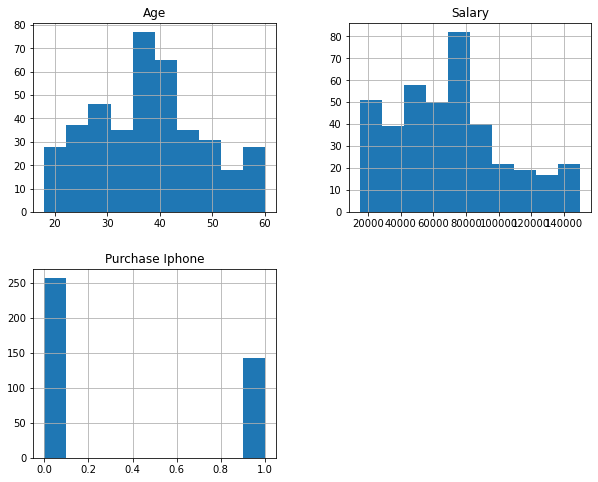

In [16]:
data.hist(figsize=(10,8), bins=10)

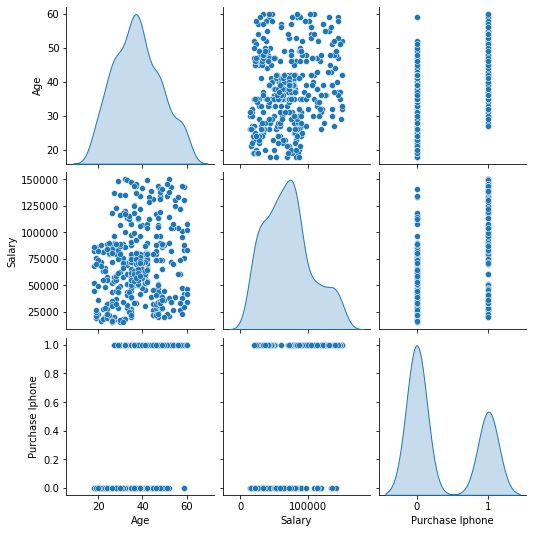

In [17]:
sns.pairplot(data, diag_kind='kde')

Text(0.5, 1.0, 'Salary vs Age')

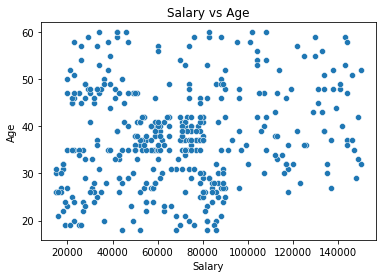

In [18]:
sns.scatterplot(data=data, x='Salary', y='Age')
plt.title('Salary vs Age')

Text(0.5, 1.0, 'Purchase Iphone vs Age')

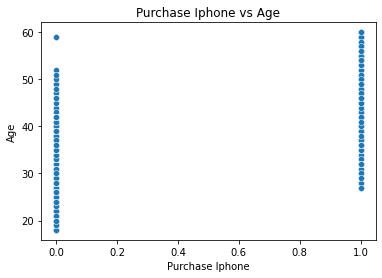

In [19]:
sns.scatterplot(data=data, x='Purchase Iphone', y='Age')
plt.title('Purchase Iphone vs Age')

Text(0.5, 1.0, 'Purchase Iphone vs Salary')

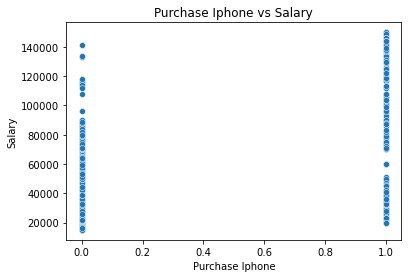

In [20]:
sns.scatterplot(data=data, x='Purchase Iphone', y='Salary')
plt.title('Purchase Iphone vs Salary')

<AxesSubplot:>

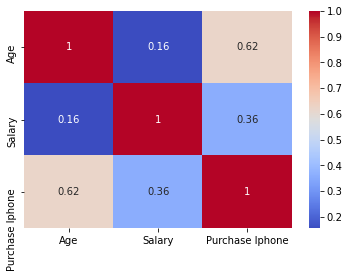

In [21]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

### Pre - Processing & Label Encoding

In [22]:
d = defaultdict(LabelEncoder)
data = data.apply(lambda lb: d[lb.name].fit_transform(lb))

In [23]:
## defining X & y
x=data.iloc[::,0:3]
y = data.iloc[::,3]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [24]:
## sampling of data
def train_test(x,y,test_size):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=1234)
    for i in x_train,x_test,y_train,y_test:
        print(i.shape)
    return x_train,x_test,y_train,y_test
print("Train and test data is being splitted...")
x_train,x_test,y_train,y_test=train_test(x,y,0.2)

Train and test data is being splitted...
(320, 3)
(80, 3)
(320,)
(80,)


## Decision Tree Classifier

In [25]:
model = DecisionTreeClassifier()
model_train = model.fit(x_train,y_train)
print("Model training is completed")
pred = model_train.predict(x_test)

Model training is completed


In [26]:
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [27]:
accuracy_score(y_test,pred)

0.85

In [28]:
con=confusion_matrix(y_test,pred)
con

array([[43, 10],
       [ 2, 25]], dtype=int64)

In [29]:
model_train.classes_

array([0, 1], dtype=int64)

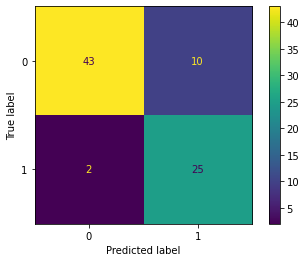

In [30]:
ConfusionMatrixDisplay(con,display_labels=model_train.classes_,).plot()